# Regresion Logistica

In [89]:
# Librerias
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics
import matplotlib.pyplot as plt

## Ejemplo Iris 

In [90]:
# Cargamos en dataset
iris = load_iris()
print(iris.target_names)
print(iris.feature_names)


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [91]:
#Creamos el dataset 
df = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target,


})
print(df.head())
print(df.shape)

   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
(150, 5)


In [92]:
#Dividimos el df en variables dependientes e independientes 
x=df.drop(['species'],axis=1)
y=df.species

In [93]:
#Dividimos los datos para entrenamiento y prueba
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [94]:
#Definimos la configuracion del modelo 
logistic_regresion_iris = LogisticRegression(max_iter=1000)

### Entrenamiento

In [95]:
#Entrenamiento 
logistic_regresion_iris.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

### Predicción

In [96]:
#Usando en modelo para realizar la predicción
ypred = logistic_regresion_iris.predict(x_test)
ypred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [97]:
#Diagnostico del modelo
cnf_matrix = metrics.confusion_matrix(y_test,ypred)
print(cnf_matrix)
print("Accuracy: ", metrics.accuracy_score(y_test,ypred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy:  0.9777777777777777


In [98]:
print(logistic_regresion_iris.coef_)
print(logistic_regresion_iris.intercept_)

[[-0.39799676  0.83424852 -2.28931447 -0.97828877]
 [ 0.54467975 -0.29061876 -0.23248626 -0.65855539]
 [-0.14668299 -0.54362976  2.52180073  1.63684416]]
[  8.99848385   1.54254216 -10.54102601]


In [99]:
print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Nuevos Registros

In [100]:
logistic_regresion_iris.predict([[5.1,0.5,2.4,1.2]])

c:\Users\JuniorOM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

## Ejemplo 02

In [101]:
#Cargar los datos
url =  "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
df1 = pd.read_csv(url)

#Mostrar los datos
print(df1.head())
print(df1.shape)

   default  student      balance        income
0        0        0   729.526495  44361.625074
1        0        1   817.180407  12106.134700
2        0        0  1073.549164  31767.138947
3        0        0   529.250605  35704.493935
4        0        0   785.655883  38463.495879
(10000, 4)


In [102]:
x1 = df1[['student','balance','income']]
y1 = df1['default']
print(x1.shape)
print(y1.shape)

(10000, 3)
(10000,)


0    9667
1     333
Name: default, dtype: int64


<AxesSubplot:ylabel='Frequency'>

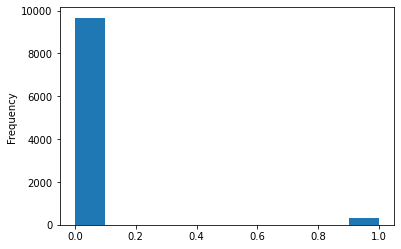

In [103]:
print(y1.value_counts())
y1.plot(kind="hist")

In [104]:
#Difivir el df1 en entrenamiento y prueba
x1_train , x1_test , y1_train , y1_test = train_test_split(x1 , y1 , test_size=0.3, random_state=0)

print(x1_train.shape)
print(y1_test.shape)


(7000, 3)
(3000,)


In [105]:
#Definir el modelo 
log01_tarjeta = LogisticRegression() 

In [106]:
#Entrenar el modelo 
log01_tarjeta.fit(x1_train,y1_train)

LogisticRegression()

In [107]:
#Predecir con el el data test
y1_pred = log01_tarjeta.predict(x1_test)
y1_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
#Diagnostico del modelo
cnf_mtrx = metrics.confusion_matrix(y1_test,y1_pred)
print(cnf_mtrx)
print("Accuracy: " ,metrics.accuracy_score(y1_test,y1_pred))

[[2870   17]
 [  93   20]]
Accuracy:  0.9633333333333334


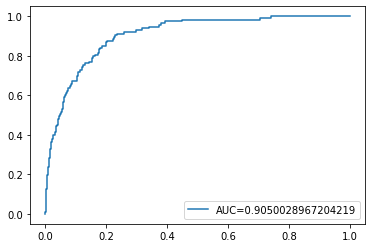

In [109]:
#Plot ROC Curve
y_pred_proba = log01_tarjeta.predict_proba(x1_test)[::,1]
fpr , tpr, _= metrics.roc_curve(y1_test, y_pred_proba)
auc = metrics.roc_auc_score(y1_test,y_pred_proba)
plt.plot(fpr,tpr,label= "AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [110]:
log01_tarjeta.predict_proba(x1_test)[::,1]

array([1.89326075e-04, 1.42768942e-04, 5.71581735e-03, ...,
       1.53798179e-01, 1.10495803e-03, 6.85351703e-04])

In [111]:
print(log01_tarjeta.coef_)
print(log01_tarjeta.intercept_)

[[-3.79999456e+00  4.03495132e-03 -1.36823955e-04]]
[-2.86843745]


In [112]:
print(metrics.classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2887
           1       0.54      0.18      0.27       113

    accuracy                           0.96      3000
   macro avg       0.75      0.59      0.62      3000
weighted avg       0.95      0.96      0.95      3000



## Aplicando Tecnica de Remuestreo SMOTE

(10000, 3)
(10000,)


<AxesSubplot:ylabel='Frequency'>

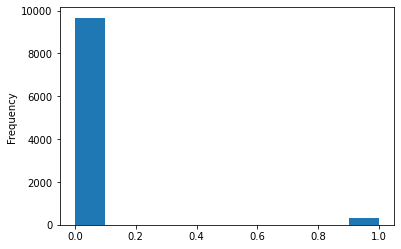

In [113]:
print(x1.shape)
print(y1.shape)

y1.plot(kind="hist")


In [114]:
import imblearn

oversamp = imblearn.over_sampling.SMOTE()
x_over, y_over = oversamp.fit_resample(x1,y1)

In [115]:
print(x1.shape)
print(x_over.shape)
print(y1.shape)
print(y_over.shape)

(10000, 3)
(19334, 3)
(10000,)
(19334,)


<AxesSubplot:ylabel='Frequency'>

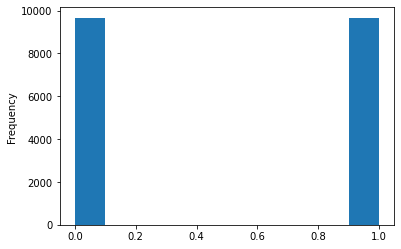

In [116]:
y_over.plot(kind="hist")

In [117]:
#Difivir el df1 en entrenamiento y prueba
x_over_train , x_over_test , y_over_train , y_over_test = train_test_split(x_over , y_over , test_size=0.3, random_state=0)

#Definir el modelo 
log01_tarjeta2 = LogisticRegression() 

#Entrenar el modelo 
log01_tarjeta2.fit(x_over_train,y_over_train)

#Predecir con el el data test
y1_pred2 = log01_tarjeta2.predict(x_over_test)
y1_pred2

#Diagnostico del modelo
cnf_mtrx = metrics.confusion_matrix(y_over_test,y1_pred2)
print(cnf_mtrx)
print("Accuracy: " ,metrics.accuracy_score(y_over_test,y1_pred2))


print(metrics.classification_report(y_over_test,y1_pred2))

[[1925  974]
 [ 371 2531]]
Accuracy:  0.7681434235476642
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      2899
           1       0.72      0.87      0.79      2902

    accuracy                           0.77      5801
   macro avg       0.78      0.77      0.77      5801
weighted avg       0.78      0.77      0.77      5801



In [118]:
print(log01_tarjeta2.coef_)
print(log01_tarjeta2.intercept_)

[[ 7.67157003e-08  2.11329671e-03 -6.97553454e-05]]
[4.01337776e-08]
